<a href="https://colab.research.google.com/github/AritraStark/QML-HEP_GSoC_22/blob/main/GSOC_Quantum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task I: Quantum Computing Part**

1) implement a simple quantum operation with Cirq

* With 5 qubits

* Apply Hadamard operation on every qubit

* Apply CNOT operation on (0, 1), (1,2), (2,3), (3,4)

* SWAP (0, 4)

* Rotate X with pi/2 on any qubit

* Plot the circuit

In [20]:
import matplotlib.pyplot as plt
import numpy as np
try:
    import cirq
except ImportError:
    print("installing cirq...")
    !pip install --quiet cirq
    print("installed cirq.")

qubit1 = cirq.NamedQubit('0')
qubit2 = cirq.NamedQubit('1')
qubit3 = cirq.NamedQubit('2')
qubit4 = cirq.NamedQubit('3')
qubit5 = cirq.NamedQubit('4')

circuit = cirq.Circuit()

circuit.append([cirq.H(qubit1), cirq.H(qubit2), cirq.H(qubit3), cirq.H(qubit4), cirq.H(qubit5)])
circuit.append([cirq.CNOT(qubit1, qubit2), cirq.CNOT(qubit2, qubit3), cirq.CNOT(qubit3, qubit4), cirq.CNOT(qubit4, qubit5)])
circuit.append(cirq.SWAP(qubit1,qubit5))

circuit.append(cirq.Rx(rads=np.pi/2)(qubit1))

print(circuit)

0: ───H───@───────────────×───Rx(0.5π)───
          │               │
1: ───H───X───@───────────┼──────────────
              │           │
2: ───H───────X───@───────┼──────────────
                  │       │
3: ───H───────────X───@───┼──────────────
                      │   │
4: ───H───────────────X───×──────────────



2) Create a circuit that is a series of small cirq.Rx rotations and plot the probability of measuring the state in the |0⟩ state. 

(6, 6): ───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.02π)───Rx(0.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 10217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 10217 missing from current font.
  font.set_text(s, 0, flags=flags)


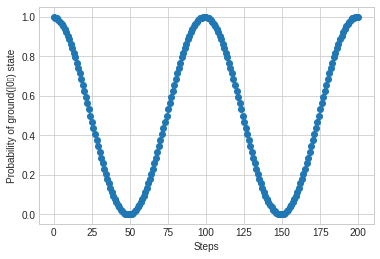

In [22]:
qubit = cirq.GridQubit(6, 6)
simulator = cirq.Simulator()
num_angles = 200

ckt = cirq.Circuit([cirq.Rx(rads=np.pi / 50.0)(qubit) for theta in range(num_angles)])
ckt.append(cirq.measure(qubit))
print(ckt)

probabilities = []

for step in simulator.simulate_moment_steps(ckt):
    probability = np.abs(step.state_vector()) ** 2
    probabilities.append(probability[0])

plt.style.use('seaborn-whitegrid')
plt.plot(probabilities, 'o')
plt.xlabel("Steps")
plt.ylabel("Probability of ground(|0⟩) state");